## Задача 1
### Постройте график. Назовите график. Сделайте именование осей x и y. Сделайте выводы.

#### 1.1. Скачать следующие данные: kc-house-data и laptop_price 
#### 1.2. Изучите стоимости недвижимости 
#### 1.3. Изучите распределение квадратуры жилой 
#### 1.4. Изучите распределение года постройки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df1 = pd.read_csv("kc_house_data.csv", sep=',', encoding='windows 1251')
df2 = pd.read_csv("laptop_price.csv", sep=',', encoding='windows 1251')

In [75]:
df1.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
619,1682500160,20140619T000000,210000.0,3,2.0,1440,7210,1.0,0,0,...,8,1440,0,1983,0,98092,47.3128,-122.184,1700,7245


In [76]:
df2.sample()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
621,628,Lenovo,ThinkPad T470,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.65kg,1465.0


In [9]:
df1[['price','sqft_living','yr_built']].head()

,price,sqft_living,yr_built
0,221900.0,1180,1955
1,538000.0,2570,1951
2,180000.0,770,1933
3,604000.0,1960,1965
4,510000.0,1680,1987


In [77]:
df1[['price','sqft_living','yr_built']].tail()

,price,sqft_living,yr_built
21608,360000.0,1530,2009
21609,400000.0,2310,2014
21610,402101.0,1020,2009
21611,400000.0,1600,2004
21612,325000.0,1020,2008


In [78]:
data = df1[['price','sqft_living','yr_built']]


### 1.2. Изучите стоимости недвижимости

''

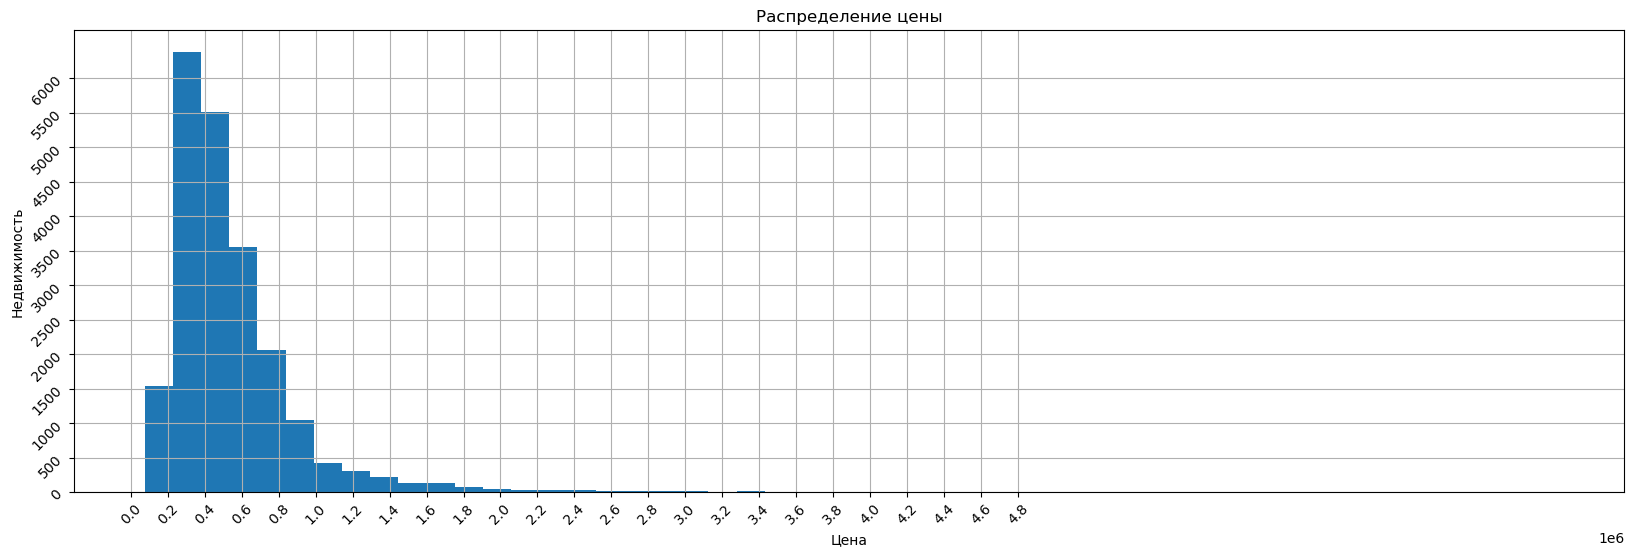

In [79]:
plt.figure(figsize=(20,6))
plt.hist(data['price'],bins=50)
plt.xlabel('Цена')
plt.ylabel('Недвижимость')
plt.title('Распределение цены')
plt.grid()
plt.xticks(range(0,5000000,200000),rotation=45)
plt.yticks(range(0,6500,500),rotation=45)
;

#### В основном на рынке представлена недвижимость в невысоком ценовом сегменте. Наибольшее количество объектов недвидимости находится в ценовом диапазоне от 200000 до 800000

### 1.3. Изучите распределение квадратуры жилой

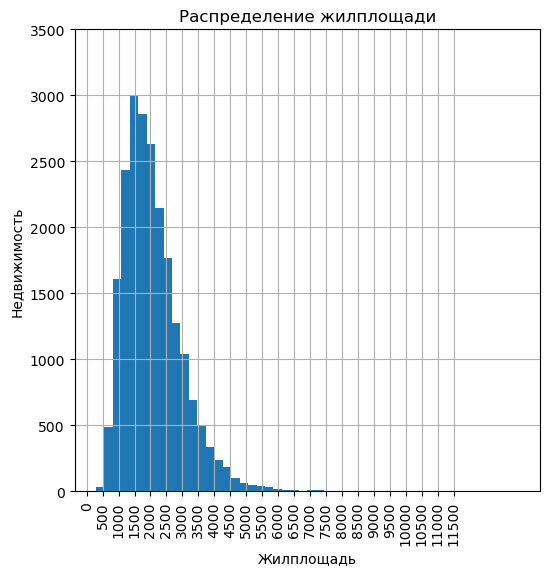

In [80]:
plt.figure(figsize=(6,6))
plt.hist(data['sqft_living'], bins = 50)
plt.xlabel('Жилплощадь')
plt.ylabel('Недвижимость')
plt.title('Распределение жилплощади')
plt.grid()
plt.xticks(range(0,12000,500),rotation=90)
plt.yticks(range(0,4000,500));

#### В основном на рынке представлена недвижимость с небольшими (относительно всех в данной базе данных) жилыми площадями. От 1000 до 2500. 

### 1.4. Изучите распределение года постройки

2015

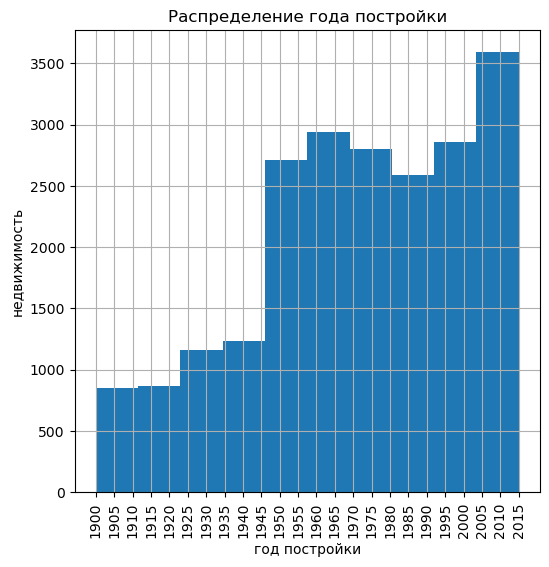

In [81]:
plt.figure(figsize=(6,6))
plt.hist(data['yr_built'])
plt.xlabel('год постройки')
plt.ylabel('недвижимость')
plt.title('Распределение года постройки')
plt.grid()
plt.xticks(range(1900,2020,5), rotation=90)
max(data['yr_built'])

### Темпы строительства недвижимости возрастают год к году. В период между 2003 и 2015 годами ведется наиболее активная застройка.

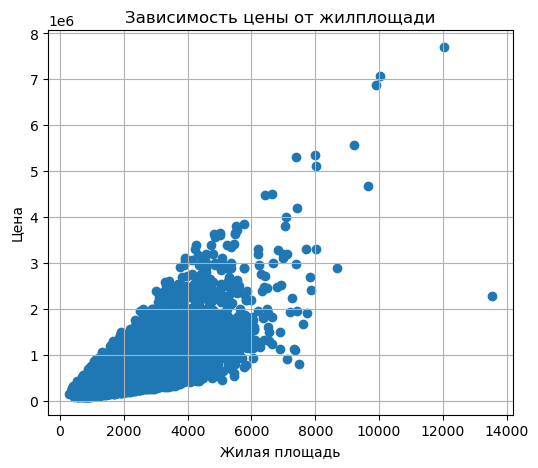

In [82]:
plt.figure(figsize=(6,5))
plt.scatter(data['sqft_living'],data['price'])
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от жилплощади')
plt.grid()

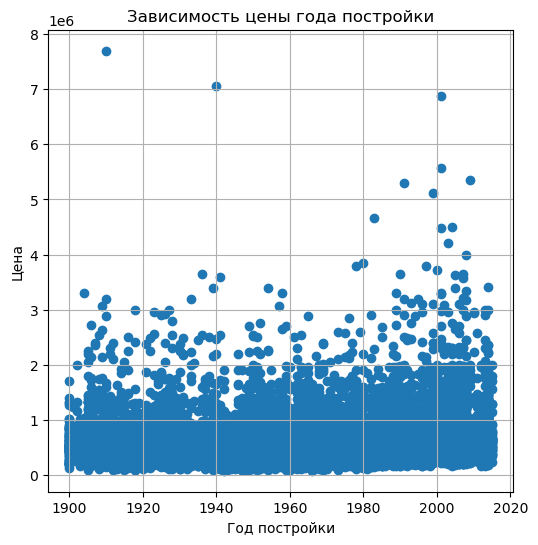

In [83]:
plt.figure(figsize=(6,6))
plt.scatter(data['yr_built'],data['price'])
plt.xlabel('Год постройки')
plt.ylabel('Цена')
plt.title('Зависимость цены года постройки')
plt.grid()

### Выводы:
#### 1. Стоимость недвижимости пропорционально возрастает при увеличении жилой пложади, однако, основная масса построек сосредоточена в области жилья с небольшой квадратурой площадей, с соответствующей невысокой стоимостью.
#### 2. Практически не наблюдается зависимости стоимости недвижимости от года постройки здания.

## Задача 2 

#### 2.1. Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы. 

In [84]:
data = df1['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

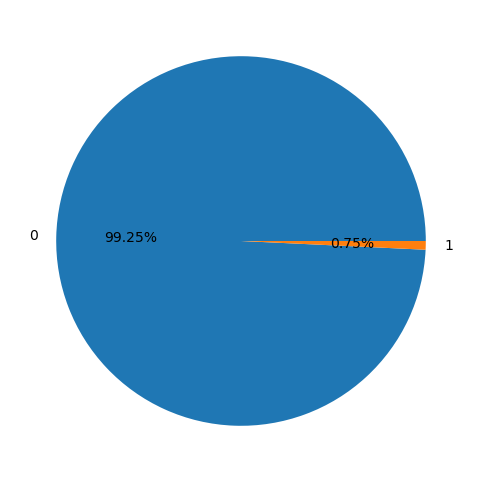

In [85]:
plt.figure(figsize=(6,6))
plt.pie(data, labels=data.index, autopct='%.2f%%');

#### Подавляющее количество объектов недвижимости не имеют выхода к набережной. 99,25% против 0,75%. 

#### 2.2. Изучите распределение этажей домов

In [86]:
data2 = df1['floors'].value_counts()
data2

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

''

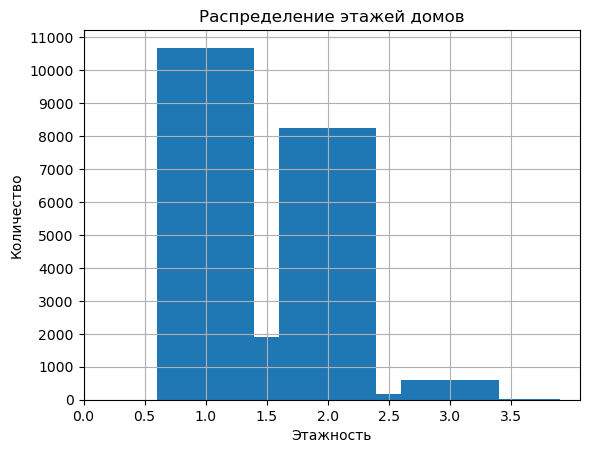

In [77]:
plt.bar(data2.index, data2)
plt.xlabel('Этажность')
plt.ylabel('Количество')
plt.title('Распределение этажей домов')
plt.grid()
plt.xticks(np.arange(0,4,0.5))
plt.yticks(range(0,12000,1000));


;

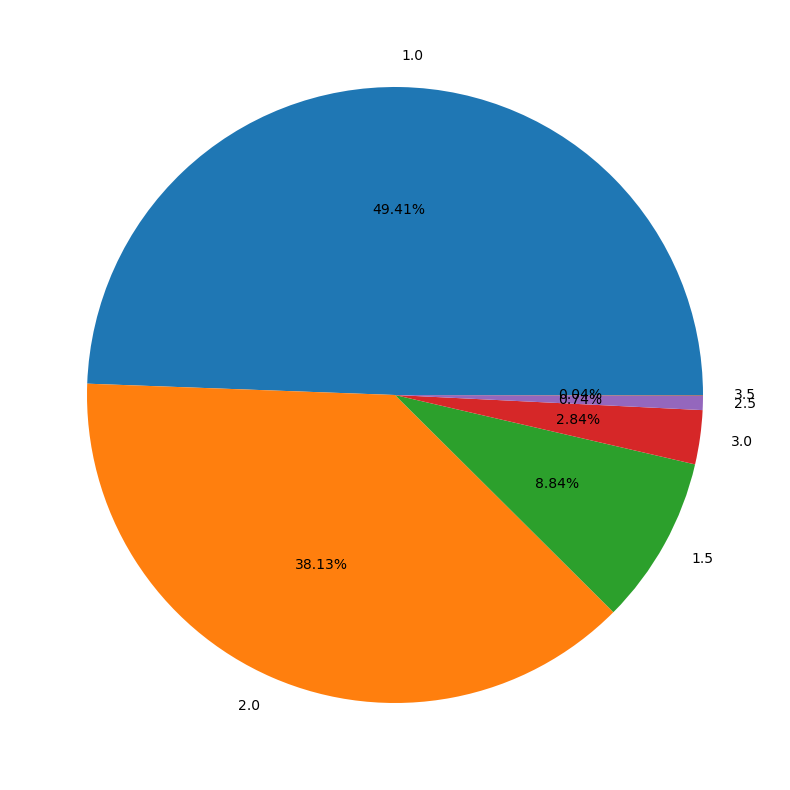

In [87]:
plt.figure(figsize=(10,10))
plt.pie(data2, labels=data2.index, autopct='%.2f%%');

#### Среди объектов недвижимости преобладают 1 (около половины всех зданий) и 2 этажные постройки. Судя по количеству объектов недвижимости и их этажности, перед нами населенный пункт, который растет в ширину, а не в высоту, что говорит, в том числе, о том, что населенный пункт не находится на острове.

#### 2.3. Изучите распределение состояния домов

In [88]:
data3 = df1['condition'].value_counts()
data3

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

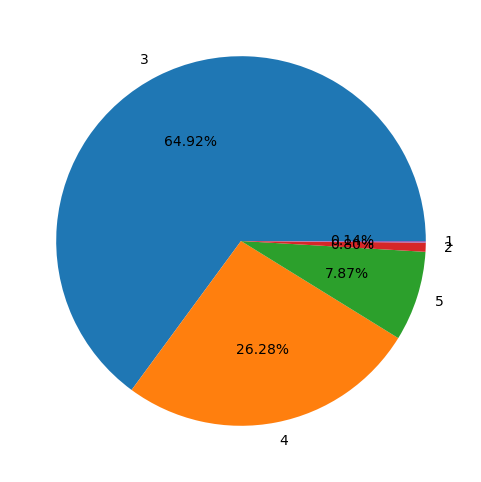

In [89]:
plt.figure(figsize=(6,6))
plt.pie(data3, labels=data3.index, autopct='%.2f%%');

#### В среднем, большинство домов среднего состояния (3 и 4 уровни градации). Около 200 домов (менее 1%) нуждаются в реновации

## Задача 3 
#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

#### 'price'  'bedrooms' 'bathrooms'  'sqft_living' 'sqft_lot' 'floors' 'waterfront' 
#### 'view' 'condition'  'grade' 'sqft_above' 'sqft_above' 'sqft_above' 'sqft_basement'
#### 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'

In [90]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 1. Оценим корреляцию 5 параметров с ценой - 'price' : 'bathrooms','sqft_living','view' ,'condition','yr_built'.

In [27]:
df3 = df1[['price','bathrooms','sqft_living','view' ,'condition','yr_built']].corr().round(2)
df3

,price,bathrooms,sqft_living,view,condition,yr_built
price,1.00,0.53,0.70,0.40,0.04,0.05
bathrooms,0.53,1.00,0.75,0.19,-0.12,0.51
sqft_living,0.70,0.75,1.00,0.28,-0.06,0.32
view,0.40,0.19,0.28,1.00,0.05,-0.05
condition,0.04,-0.12,-0.06,0.05,1.00,-0.36
yr_built,0.05,0.51,0.32,-0.05,-0.36,1.00


### Построим графическое отображение корреляции

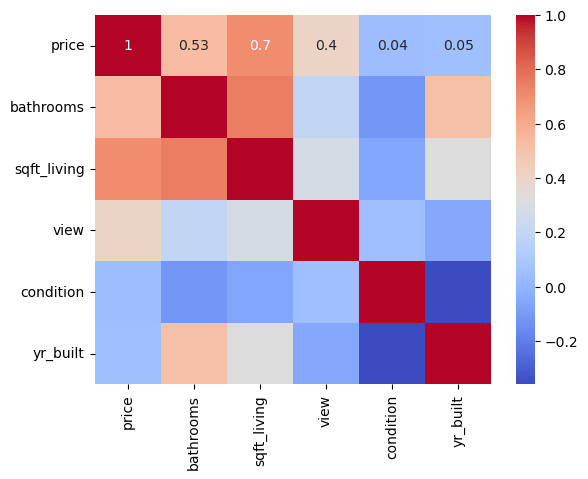

In [32]:
sns.heatmap(df3,annot = True,cmap='coolwarm');

### Согласно таблице и графику корреляции, цена в наибольшей степени зависит от площади недвижимости (жилой) и практически не зависит от года постройки. Здесь можно сделать вывод, что основными ценностями для покупателей (из выбранных) являются - размеры, вид из окна и наличие ванных комнат, даже если со стен сыпится штукатурка и полы скрипят и оставляют занозы. Далее, по отдельности на каждый влияющий фактор.

### 2. Оценим влияние ванных комнат на цену недвижимости.

Text(0.5, 1.0, 'Взаимосвязь цены и количества ванных комнат')

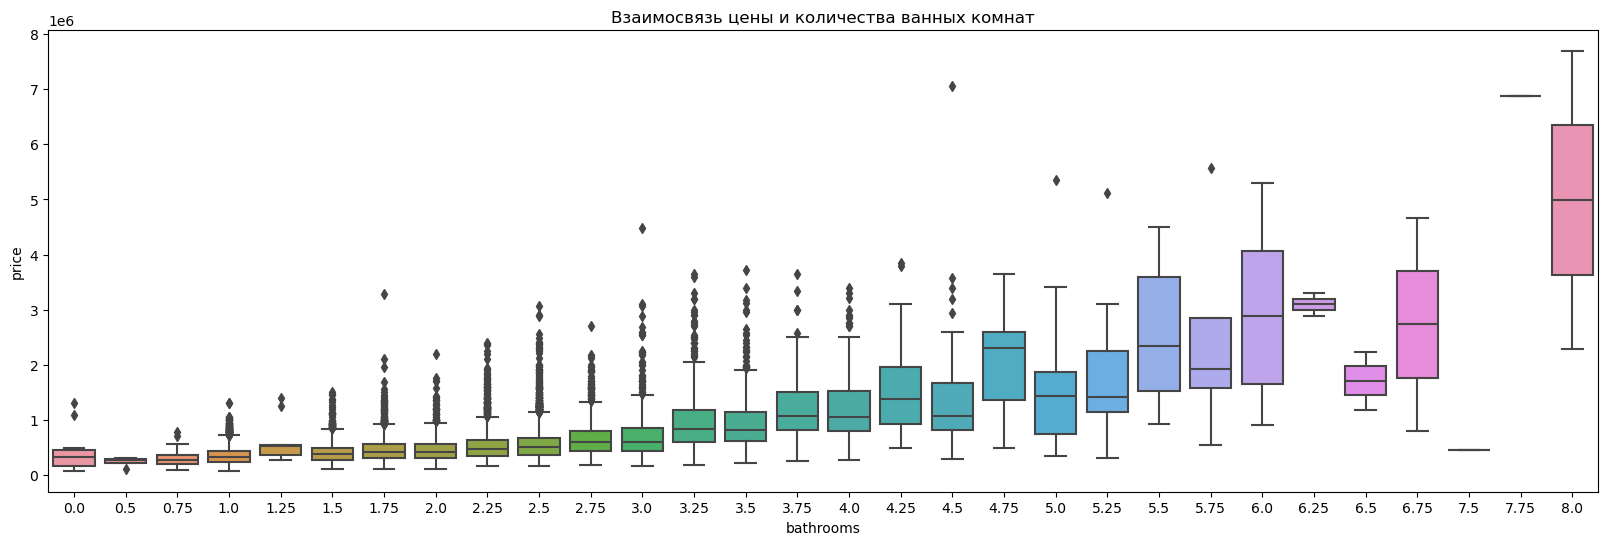

In [38]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df1['bathrooms'], y=df1['price'])
plt.title("Взаимосвязь цены и количества ванных комнат")

### Количество ванных комнат определяют прирост цены недвижимости. Не совсем понятно, что такое 4.75 или 1.25 ванной комнаты. Разброс цен в зависимости от количества ванных комнат также возрастает.

### 3. Оценим влияние ванных жилой площади на цену недвижимости.

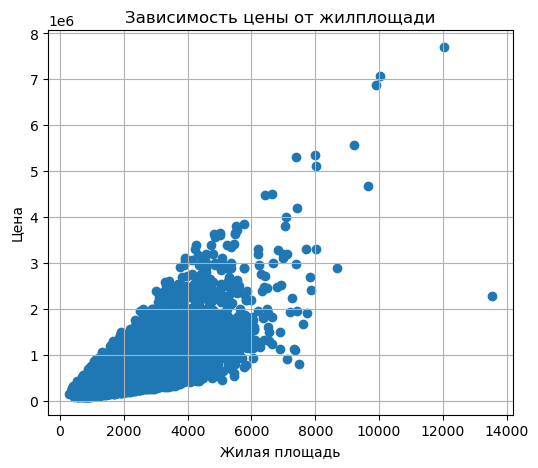

In [47]:
data4 = df1[['price','sqft_living']]
plt.figure(figsize=(6,5))
plt.scatter(data4['sqft_living'],data4['price'])
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от жилплощади')
plt.grid()

### Основное количество предложений расположени в диапазоне до 6000 кв.м жилплощади и 3.500 000 денег. С увеличением жилплощади очевидно возрастает цена недвижимости. Причем корреляция 0.7. говорит о достаточно близкой к линейной зависимости.

### 4. Оценим влияние вида на цену недвижимости.

Text(0.5, 1.0, 'Взаимосвязь цены и вида')

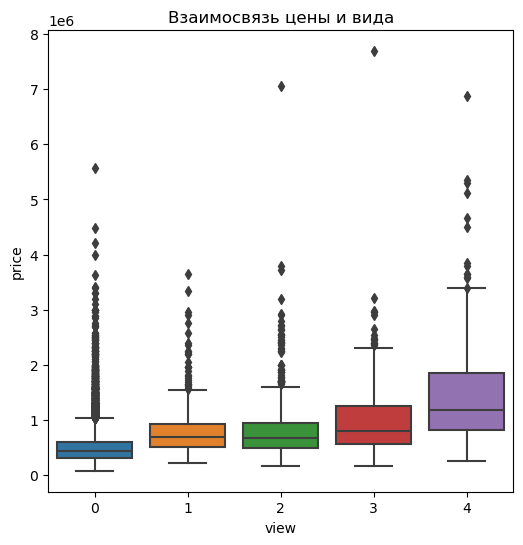

In [48]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df1['view'], y=df1['price'])
plt.title("Взаимосвязь цены и вида")

### В целом, вид не слишком сильно оказывает влияние на ценовой диапазон. Хотя и прослеживается увеличение цены в зависимости от вида из окна.

### 5. Оценим влияние состояния постройки на цену недвижимости.

In [60]:
data5 = df1[['price','condition']]
data5.head()

,price,condition
0,221900.0,3
1,538000.0,3
2,180000.0,3
3,604000.0,5
4,510000.0,3


''

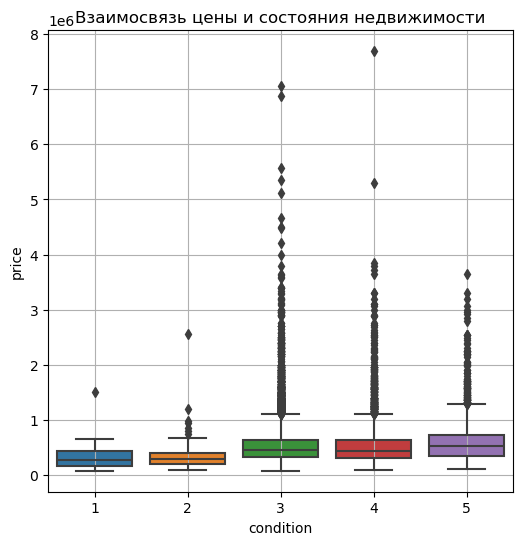

In [69]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df1['condition'], y=df1['price'])
plt.title("Взаимосвязь цены и состояния недвижимости")
plt.grid()
;


### Как и в случае с годом постройки, с учетом низкой корреляции, состояние постройки практисеки не оказывает влияния на ее цену